In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *
from tensorflow.keras.layers import Dense, Flatten

%matplotlib inline
np.random.seed(1)

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


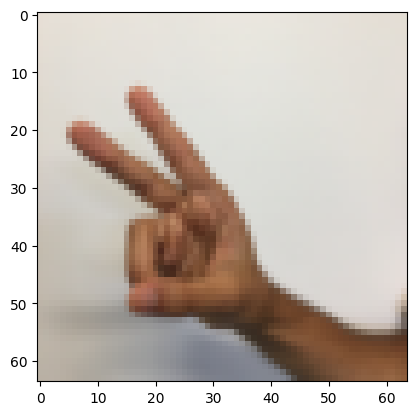

In [3]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
tf.random.set_seed(1)
initializer = tf.initializers.GlorotNormal(seed=1)
tf.Variable(initializer(shape = (25,12288)), trainable = True, dtype=tf.float32)

<tf.Variable 'Variable:0' shape=(25, 12288) dtype=float32, numpy=
array([[ 0.00183502, -0.00714326,  0.00914525, ..., -0.01221176,
         0.01656458,  0.00526992],
       [ 0.02264025,  0.0067227 ,  0.00795862, ...,  0.00284724,
         0.01910819,  0.00122853],
       [-0.00163333, -0.00861273, -0.01398893, ..., -0.00741132,
         0.02071251, -0.026417  ],
       ...,
       [-0.00126929,  0.01729332,  0.02082342, ...,  0.01709594,
         0.00429358, -0.00733263],
       [ 0.00275988,  0.00419503,  0.00949959, ...,  0.01241149,
        -0.0270652 ,  0.01501104],
       [-0.00145541,  0.02459595,  0.00339064, ..., -0.02478788,
         0.02716016, -0.00306428]], dtype=float32)>

In [6]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.random.set_seed(1)
    initializer = tf.initializers.GlorotNormal(seed=1)
    
    W1 = tf.Variable(initializer(shape = (4, 4, 3, 8)), trainable = True)
    W2 = tf.Variable(initializer(shape = (2, 2, 8, 16)), trainable = True)
    
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [7]:
parameters = initialize_parameters()
print("W1 = " + str(parameters["W1"]))
print("W2 = " + str(parameters["W2"]))

W1 = <tf.Variable 'Variable:0' shape=(4, 4, 3, 8) dtype=float32, numpy=
array([[[[ 0.01534854, -0.05974785,  0.07649294, -0.09559899,
          -0.11026396, -0.04837413, -0.0046196 ,  0.05671703],
         [-0.00181646, -0.1700235 ,  0.20777455, -0.16700262,
           0.04535378,  0.08272772, -0.02609729, -0.06324629],
         [-0.02021237, -0.07139568, -0.00106709, -0.02604943,
           0.03546352,  0.00794708, -0.02183922,  0.14247212]],

        [[ 0.08296883,  0.1264347 ,  0.02993656,  0.08921677,
           0.00371175, -0.16073424, -0.01994411,  0.00244671],
         [ 0.06535985, -0.10344196, -0.03626273, -0.04782426,
          -0.12782049, -0.10377485, -0.07091782, -0.13882929],
         [ 0.19669226,  0.01957541,  0.06574649,  0.18710726,
           0.08770291, -0.03800778,  0.09093697, -0.08645022]],

        [[ 0.05080281, -0.04719632,  0.034345  ,  0.05905182,
          -0.17356904, -0.06549107, -0.07732613, -0.05725493],
         [ 0.03695069, -0.06444121, -0.15028995, 

In [8]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    #1st Layer of Conv2d
    Z1 = tf.nn.conv2d(X, W1, strides = [1, 1, 1, 1], padding = "SAME")
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding = "SAME")
    
    #2nd Layer of Conv2d
    Z2 = tf.nn.conv2d(P1, W2, strides = [1, 1, 1, 1], padding = "SAME")
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding = "SAME")
    
    F3 = Flatten()(P2)
    D3 = Dense(6)(F3)
    
    return D3    

In [9]:
np.random.seed(1)
parameters = initialize_parameters()
Z3 = forward_propagation(tf.convert_to_tensor(np.random.randn(2,64,64,3), dtype=tf.float32), parameters)
print("Z3 = " + str(Z3))

Z3 = tf.Tensor(
[[ 0.8553334   1.2931371   1.6583148  -2.3202338  -0.6814357  -2.0716565 ]
 [ 0.7653389   0.9786853   2.0539522  -2.391072   -0.29732245 -2.0024254 ]], shape=(2, 6), dtype=float32)


In [10]:

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = Z3))
    
    return cost

In [11]:
parameters = initialize_parameters()
Z3 = forward_propagation(tf.convert_to_tensor(np.random.randn(4,64,64,3), dtype=tf.float32), parameters)
cost = compute_cost(Z3, tf.convert_to_tensor(np.random.randn(4, 6), dtype=tf.float32))
print("cost = " + str(cost.numpy()))

cost = 5.643823


In [16]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    #tf.set_random_seed(1)                             
    seed = 3                                          
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []
    
    # Initialize Parameters
    parameters = initialize_parameters()
    #print(parameters)
    
    #Optimizer
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    
    #Train the model
    for epoch in range(num_epochs):
        minibatch_cost = 0.
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
        
        for minibatch in minibatches:
            minibatch_X, minibatch_Y = minibatch

            with tf.GradientTape() as tape:
                # Forward Prop
                D3 = forward_propagation(minibatch_X, parameters)
                
                # Compute Cost
                cost = compute_cost(D3, minibatch_Y)
                
                # Back Prop
                grads = tape.gradient(cost, [parameters])
                processed_grads = [value for key, value in grads[0].items()]
                processed_parameters = [value for key, value in parameters.items()]
                
                # Apply gradients using optimizers
                optimizer.apply_gradients(zip(processed_grads, processed_parameters))
                #optimizer.minimize(cost, [parameters], tape, grads)
                
            minibatch_cost += cost
            
        # Print the cost every epoch
        if print_cost == True and epoch % 5 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
        
        if print_cost == True and epoch % 1 == 0:
            costs.append(minibatch_cost)
            
        if epoch == 99:
            # Calculate the correct predictions
            predict_op = tf.argmax(D3, 1)
            correct_prediction = tf.equal(predict_op, tf.argmax(Y_train, 1))
            
            # Calculate accuracy on the test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print(accuracy)
            train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
            test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
            print("Train Accuracy:", train_accuracy)
            print("Test Accuracy:", test_accuracy)

        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

                
    return parameters

In [17]:
parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 30.579924
Cost after epoch 5: 30.459932
Cost after epoch 10: 30.459991
Cost after epoch 15: 30.459900
Cost after epoch 20: 30.459911
Cost after epoch 25: 30.459967
Cost after epoch 30: 30.459970
Cost after epoch 35: 30.459915
Cost after epoch 40: 30.459913
Cost after epoch 45: 30.459923
Cost after epoch 50: 30.459930
Cost after epoch 55: 30.459911
Cost after epoch 60: 30.459911
Cost after epoch 65: 30.459911
Cost after epoch 70: 30.459911
Cost after epoch 75: 30.459911
Cost after epoch 80: 30.459911
Cost after epoch 85: 30.459911
Cost after epoch 90: 30.459911
Cost after epoch 95: 30.459911


NameError: name 'Y' is not defined